In [1]:
!pip install "pandas>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [2]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# conda install -c anaconda seaborn
import seaborn as sns

!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib as mpl

mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')

mpl.rc('font', family='Sarabun')




!pip install fontTools




# Check the font that matplotlib currently uses

mpl.rcParams['font.family'] #= 'Sarabun'

sns.set()  # Plot using the seaborn style

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Pandas 2.0.3
NumPy 1.22.4
IPython 7.34.0
Matplotlib 3.7.1
Seaborn 0.12.2


In [3]:
df_au = pd.read_csv("Electicity_Consumption_By_Sector.csv")
df_au['Grand Total'] = (df_au['Grand Total']*1000/3600).round(2)
df_au.info()
df_au.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 21 non-null     int64  
 1   Residential          21 non-null     int64  
 2   Small General        21 non-null     int64  
 3   Medium General       21 non-null     int64  
 4   Large General        21 non-null     int64  
 5   Specific Business    21 non-null     int64  
 6   Gov. & Nonprofit     21 non-null     int64  
 7   Agriculture Pumping  21 non-null     int64  
 8   Temporary            21 non-null     int64  
 9   Stand By Rate        21 non-null     int64  
 10  Interruptible Rate   21 non-null     int64  
 11  Free of Charge       21 non-null     int64  
 12  Total MEA+PEA        21 non-null     int64  
 13  Direct Customer      21 non-null     int64  
 14  Grand Total          21 non-null     float64
dtypes: float64(1), int64(14)
memory usage: 2.6

,Year,Residential,Small General,Medium General,Large General,Specific Business,Gov. & Nonprofit,Agriculture Pumping,Temporary,Stand By Rate,Interruptible Rate,Free of Charge,Total MEA+PEA,Direct Customer,Grand Total
16,2561,45205,21319,30550,75519,6483,204,365,1357,112,1936,3255,186306,1526,52175.56
17,2562,49202,22342,31384,74582,6794,211,468,1415,176,1540,3410,191523,1437,53600.00
18,2563,52860,21116,29796,69912,4748,204,417,1353,109,1487,3586,185587,1459,51957.22
19,2564,54290,20717,29589,73187,4019,201,398,1249,153,1635,3794,189232,1236,52907.78
20,2565,53747,21606,30895,76008,5296,216,335,1297,679,1858,4068,196005,1251,54793.61


In [4]:
df_au2 = pd.read_csv("AU_KWh_All_by_year.csv")
df_au2['MW'] = (df_au2['KWh']/1000/3600).round(2)
df_au2.info()
df_au2.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    10 non-null     int64  
 1   KWh     10 non-null     int64  
 2   MW      10 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


,year,KWh,MW
5,2561,131934626422,36648.51
6,2562,135308781694,37585.77
7,2563,131848891394,36624.69
8,2564,136395996634,37887.78
9,2565,141000502548,39166.81


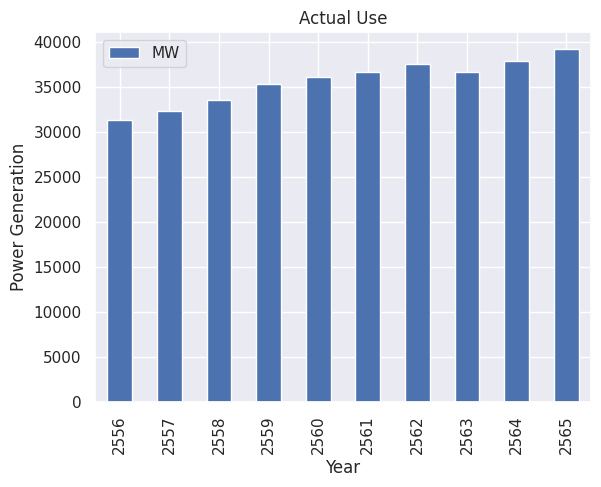

In [5]:
df_au2=df_au2[['year','MW']]
df_au2.plot(x='year', kind='bar', stacked=True,  )
# plt.legend(loc = 'upper right')
plt.xlabel('Year')
plt.ylabel('Power Generation')
plt.title('Actual Use')
plt.show()

In [6]:
df_power_producr = pd.read_csv("Power_Gen_By_producer.csv")
df_power_producr = pd.merge( df_power_producr, df_au2, left_on='Year', right_on='year', how='left' ).replace('-', None)
df_power_producr['percentdiff']=(1-df_power_producr['MW']/df_power_producr['Total'])
df_power_producr.info()
df_power_producr.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         22 non-null     int64  
 1   EGAT         22 non-null     int64  
 2   IPP          22 non-null     int64  
 3   SPP          22 non-null     int64  
 4   Imported     22 non-null     int64  
 5   Total        22 non-null     int64  
 6   year         10 non-null     float64
 7   MW           10 non-null     float64
 8   percentdiff  10 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 1.7 KB


,Year,EGAT,IPP,SPP,Imported,Total,year,MW,percentdiff
17,2561,15790,14949,8757,3878,43374,2561.0,36648.51,0.155058
18,2562,15130,14949,9498,5720,45297,2562.0,37585.77,0.170237
19,2563,16037,14249,9474,5721,45480,2563.0,36624.69,0.194708
20,2564,16082,15499,9381,5721,46682,2564.0,37887.78,0.188386
21,2565,16920,16749,9195,6235,49098,2565.0,39166.81,0.202273


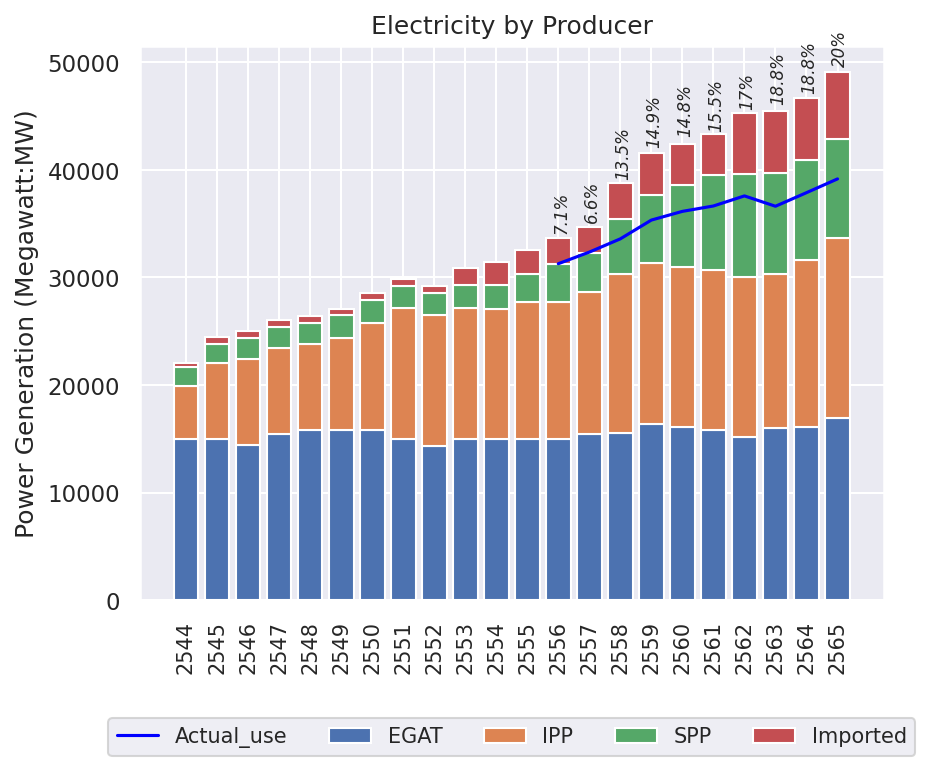

In [7]:
data2 = df_power_producr
sns.set(rc={'figure.dpi':150})
years = data2['Year'].astype(str)
egat_values = data2['EGAT']
ipp_values = data2['IPP']
spp_values = data2['SPP']
imported_values = data2['Imported']

percent_values= data2['percentdiff'].tolist
use_values = data2['MW']

# Plotting the stacked bar chart
plt.bar(years, egat_values, label='EGAT')
plt.bar(years, ipp_values, bottom=egat_values, label='IPP')
plt.bar(years, spp_values, bottom=egat_values + ipp_values, label='SPP')
plt.bar(years, imported_values, bottom=egat_values + ipp_values+spp_values, label='Imported')

# Plotting the line chart
plt.plot(years, use_values, color='Blue', label='Actual_use')

# Formatting the plot
plt.ylabel('Power Generation (Megawatt:MW)')
plt.title('Electricity by Producer')

# plt.legend(bbox_to_anchor=(1, 0.6))

plt.legend(bbox_to_anchor=(0.5, -0.3),
           loc='lower center', fontsize='10', ncol=10)


plt.xticks(fontsize=10,rotation = 90)
plt.text(16.8, 44000, '15.5%', style='italic',fontsize=8,rotation = 90)
plt.text(20.8, 50000, '20%', style='italic',fontsize=8,rotation = 90)
plt.text(17.8, 46000, '17%', style='italic',fontsize=8,rotation = 90)
plt.text(18.8, 46500, '18.8%', style='italic',fontsize=8,rotation = 90)
plt.text(11.8, 34500, '7.1%', style='italic',fontsize=8,rotation = 90)
plt.text(12.8, 35500, '6.6%', style='italic',fontsize=8,rotation = 90)
plt.text(13.8, 39500, '13.5%', style='italic',fontsize=8,rotation = 90)
plt.text(14.8, 42500, '14.9%', style='italic',fontsize=8,rotation = 90)
plt.text(15.8, 43500, '14.8%', style='italic',fontsize=8,rotation = 90)
plt.text(19.8, 47500, '18.8%', style='italic',fontsize=8,rotation = 90)

# Displaying the plot
plt.show()

In [11]:
df_fuel = pd.read_csv("Power Generation Classified by Fuel Type GWh.csv")

#Convert GWH to MW
df_fuel['Hydro Electricity']=(df_fuel['Hydro Electricity']*1000/3600).round(2)
df_fuel['Fuel Oil']=(df_fuel['Fuel Oil']*1000/3600).round(2)
df_fuel['Coal & Lignite']=(df_fuel['Coal & Lignite']*1000/3600).round(2)
df_fuel['Natural Gas']=(df_fuel['Natural Gas']*1000/3600).round(2)
df_fuel['Diesel']=(df_fuel['Diesel']*1000/3600).round(2)
df_fuel['Imported ']=(df_fuel['Imported']*1000/3600).round(2)
df_fuel['Renewable Energy']=(df_fuel['Renewable Energy']*1000/3600).round(2)


df_fuel=df_fuel[['Year','Natural Gas','Imported','Coal & Lignite','Renewable Energy','Hydro Electricity','Diesel','Fuel Oil']]

df_fuel.info()
df_fuel.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               10 non-null     int64  
 1   Natural Gas        10 non-null     float64
 2   Imported           10 non-null     int64  
 3   Coal & Lignite     10 non-null     float64
 4   Renewable Energy   10 non-null     float64
 5   Hydro Electricity  10 non-null     float64
 6   Diesel             10 non-null     float64
 7   Fuel Oil           10 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 768.0 bytes


,Year,Natural Gas,Imported,Coal & Lignite,Renewable Energy,Hydro Electricity,Diesel,Fuel Oil
0,2556,33116.11,12572,9820.00,2009.44,1503.33,49.72,343.89
1,2557,33420.56,12260,10436.67,2512.78,1434.44,17.50,446.11
2,2558,35701.39,14414,9606.11,2789.17,1044.72,35.00,221.39
3,2559,35041.67,19825,10307.50,3482.50,984.17,48.33,88.33
4,2560,33623.33,24427,9925.56,4151.11,1301.94,55.00,36.94


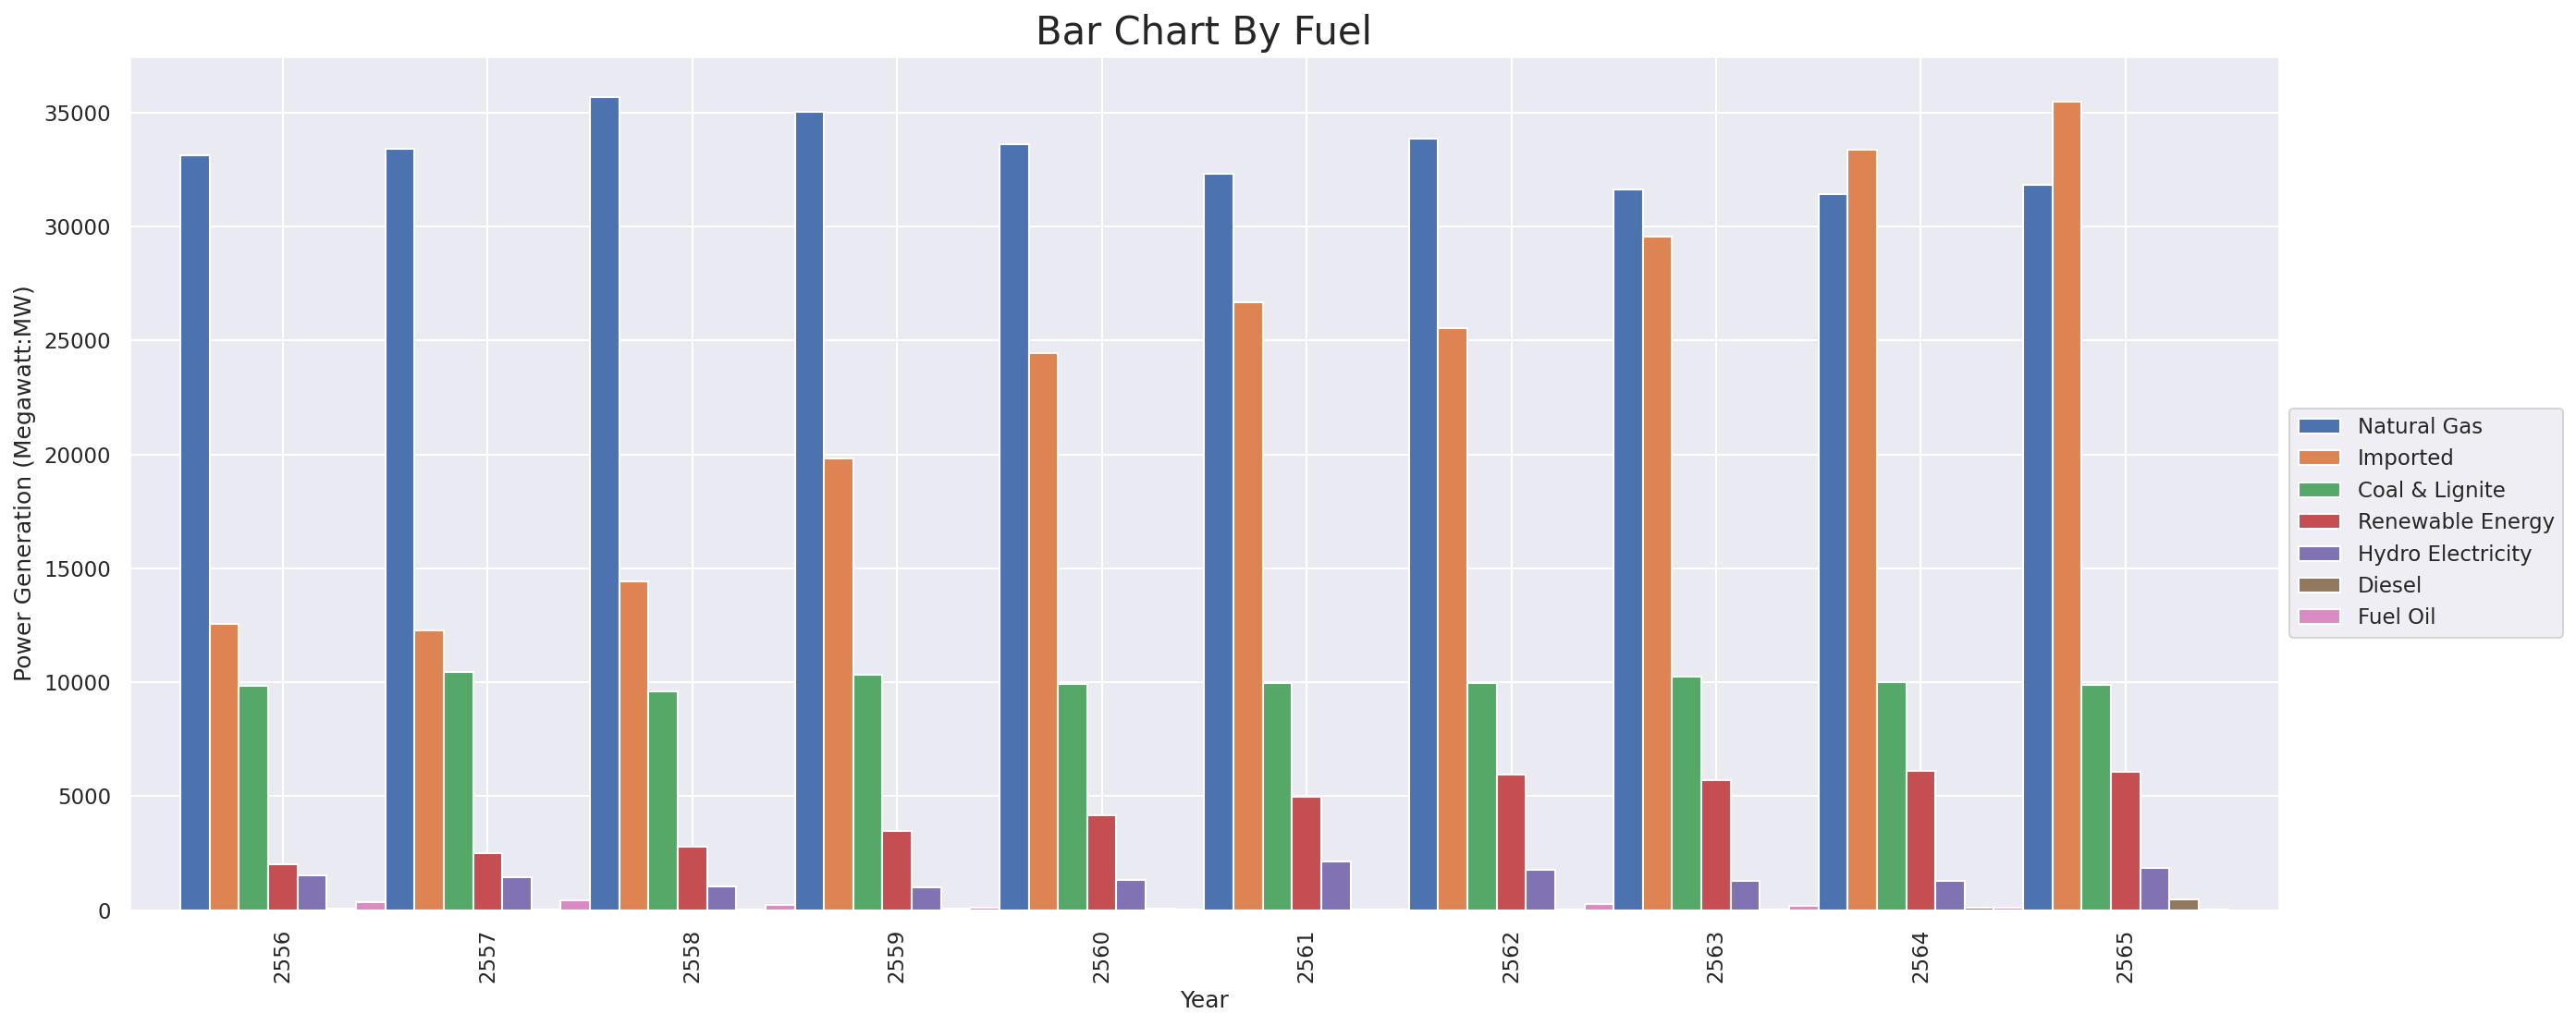

In [13]:
df_fuel.plot(x='Year', kind='bar',figsize=(20,8),width = 1,title='Forcast PDP2010-2018')
sns.set(rc={'figure.dpi':150})
# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Power Generation (Megawatt:MW)')
plt.title('Bar Chart By Fuel',fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 0.6))

# Displaying the plot
plt.show()

In [15]:
df_egat_p = pd.read_csv("EGAT_Producr.csv")
#Convert GHH to MW
df_egat_p['Hydro']=(df_egat_p['Hydro']*1000/3600).round(2)
df_egat_p['Fuel_Oil']=(df_egat_p['Fuel_Oil']*1000/3600).round(2)
df_egat_p['Lignite']=(df_egat_p['Lignite']*1000/3600).round(2)
df_egat_p['Natural_Gas']=(df_egat_p['Natural_Gas']*1000/3600).round(2)
df_egat_p['Diesel']=(df_egat_p['Diesel']*1000/3600).round(2)
df_egat_p['Geothermal']=(df_egat_p['Geothermal']*1000/3600).round(2)
df_egat_p['Imported']=(df_egat_p['Imported']*1000/3600).round(2)
df_egat_p['Renewable']=(df_egat_p['Renewable']*1000/3600).round(2)


#Merage Hydro and Hydro PDP
df_egat_p = pd.merge( df_power_producr, df_egat_p, left_on='year', right_on='year', how='left' ).fillna(0).replace(0, None).astype(float)
df_egat_p['total_EGAT']=(df_egat_p['Hydro']+df_egat_p['Fuel_Oil']+df_egat_p['Lignite']+df_egat_p['Natural_Gas']+df_egat_p['Diesel']+df_egat_p['Imported_y']+df_egat_p['Renewable'])
df_egat_p['private']=df_egat_p['Total']-df_egat_p['total_EGAT']
df_egat_p.info()
df_egat_p.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         22 non-null     float64
 1   EGAT         22 non-null     float64
 2   IPP          22 non-null     float64
 3   SPP          22 non-null     float64
 4   Imported_x   22 non-null     float64
 5   Total        22 non-null     float64
 6   year         10 non-null     float64
 7   MW           10 non-null     float64
 8   percentdiff  10 non-null     float64
 9   Hydro        8 non-null      float64
 10  Fuel_Oil     8 non-null      float64
 11  Lignite      8 non-null      float64
 12  Natural_Gas  8 non-null      float64
 13  Diesel       8 non-null      float64
 14  Geothermal   8 non-null      float64
 15  Renewable    8 non-null      float64
 16  Imported_y   8 non-null      float64
 17  total_EGAT   8 non-null      float64
 18  private      8 non-null      float64
dtypes: float64

,Year,EGAT,IPP,SPP,Imported_x,Total,year,MW,percentdiff,Hydro,Fuel_Oil,Lignite,Natural_Gas,Diesel,Geothermal,Renewable,Imported_y,total_EGAT,private
17,2561.0,15790.0,14949.0,8757.0,3878.0,43374.0,2561.0,36648.51,0.155058,2110.28,9.94,4916.23,10797.87,31.05,0.41,2.59,7408.18,25276.14,18097.86
18,2562.0,15130.0,14949.0,9498.0,5720.0,45297.0,2562.0,37585.77,0.170237,1752.77,274.06,4970.80,11062.61,38.12,0.35,17.45,7096.29,25212.10,20084.90
19,2563.0,16037.0,14249.0,9474.0,5721.0,45480.0,2563.0,36624.69,0.194708,1261.07,173.36,5066.26,11918.52,27.08,0.31,22.75,8208.49,26677.53,18802.47
20,2564.0,16082.0,15499.0,9381.0,5721.0,46682.0,2564.0,37887.78,0.188386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2565.0,16920.0,16749.0,9195.0,6235.0,49098.0,2565.0,39166.81,0.202273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


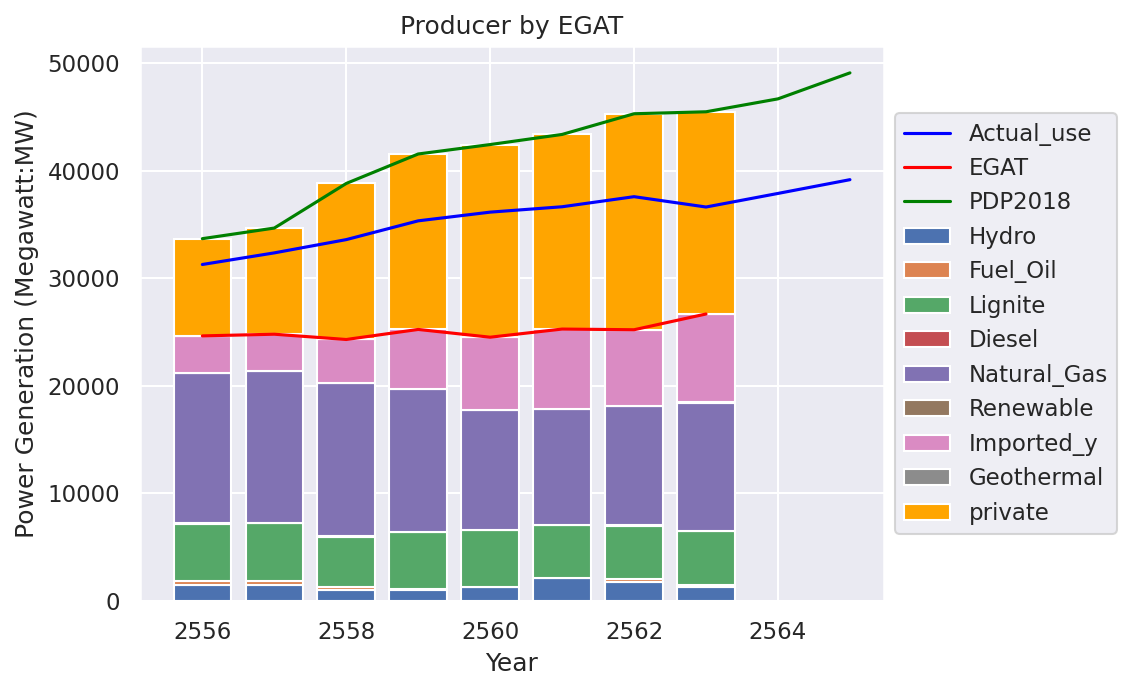

In [16]:

data3 = df_egat_p
sns.set(rc={'figure.dpi':150})
years = data3['year']
hydro_values = data3['Hydro']
oil_values = data3['Fuel_Oil']
lignite_values = data3['Lignite']
diesel_values = data3['Diesel']
gas_values = data3['Natural_Gas']
renewable_values = data3['Renewable']
imported_y_values = data3['Imported_y']
Geothermal_values = data3['Geothermal']
private_values = data3['private']
use_values = data3['MW']
total_EGAT_values= data3['total_EGAT']
total_values = data3['Total']


# Plotting the stacked bar chart
plt.bar(years, hydro_values, label='Hydro')
plt.bar(years, oil_values, bottom=hydro_values, label='Fuel_Oil')
plt.bar(years, lignite_values, bottom=hydro_values + oil_values, label='Lignite')
plt.bar(years, diesel_values, bottom=hydro_values + oil_values+lignite_values, label='Diesel')
plt.bar(years, gas_values, bottom=hydro_values + oil_values+lignite_values+diesel_values, label='Natural_Gas')
plt.bar(years, renewable_values, bottom=hydro_values + oil_values+lignite_values+diesel_values+gas_values, label='Renewable')
plt.bar(years, imported_y_values, bottom=hydro_values + oil_values+lignite_values+diesel_values+gas_values+renewable_values, label='Imported_y')
plt.bar(years, Geothermal_values, bottom=hydro_values + oil_values+lignite_values+diesel_values+gas_values+renewable_values+imported_y_values, label='Geothermal')
plt.bar(years, private_values, bottom=hydro_values + oil_values+lignite_values+diesel_values+gas_values+renewable_values+imported_y_values+Geothermal_values, label='private',color='orange')
# plt.bar(years, imported_values, bottom=egat_values + ipp_values+spp_values, label='Imported')




# Plotting the line chart
plt.plot(years, use_values, color='Blue', label='Actual_use')
plt.plot(years, total_EGAT_values, color='red', label='EGAT')
plt.plot(years, total_values, color='green', label='PDP2018')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Power Generation (Megawatt:MW)')
plt.title('Producer by EGAT')
plt.legend(bbox_to_anchor=(1.0, 0.9))
# Displaying the plot
plt.show()

In [17]:
df_demand = pd.read_csv("PDPDemand2010-2018.csv")
df_demand.info()
df_demand.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               23 non-null     int64
 1   Demand2010         23 non-null     int64
 2   ForcastDemand2010  23 non-null     int64
 3   Demand2015         23 non-null     int64
 4   ForcastDemand2015  23 non-null     int64
 5   Demand2018         23 non-null     int64
 6   ForcastDemand2018  23 non-null     int64
dtypes: int64(7)
memory usage: 1.4 KB


,Year,Demand2010,ForcastDemand2010,Demand2015,ForcastDemand2015,Demand2018,ForcastDemand2018
18,2576,0,0,47025,65592,48627,70205
19,2577,0,0,47854,66965,49921,71562
20,2578,0,0,48713,68456,51265,73984
21,2579,0,0,49655,70335,52609,76435
22,2580,0,0,0,0,53997,77211


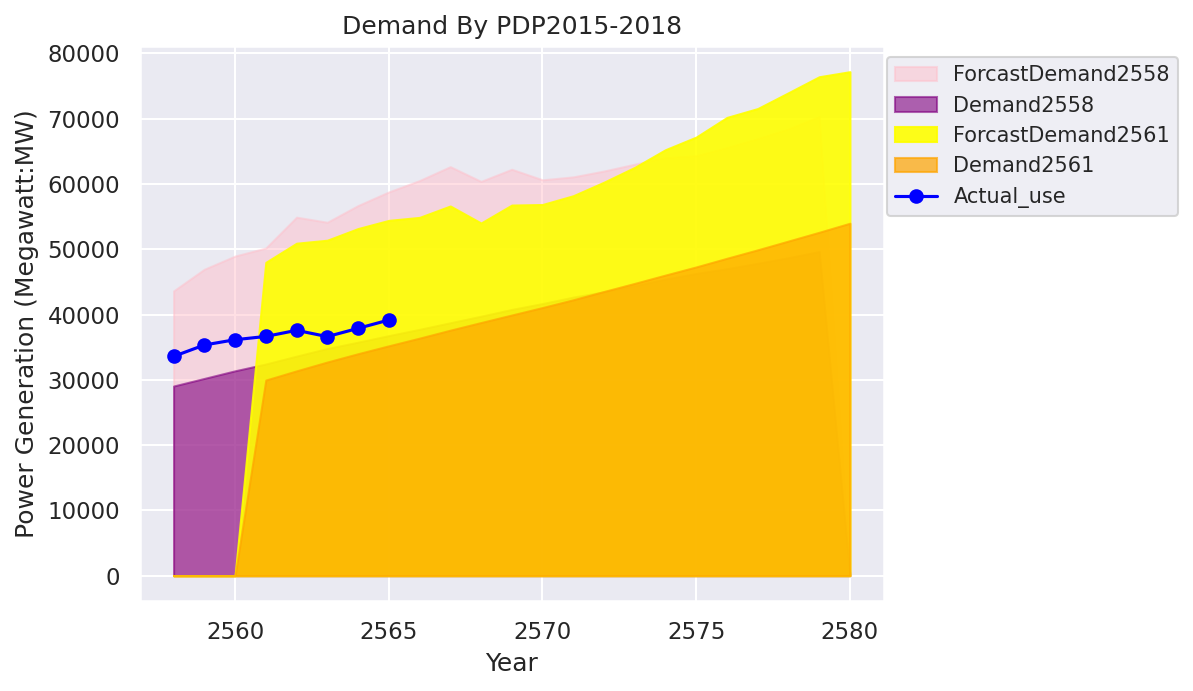

In [18]:
sns.set(rc={'figure.dpi':150})
plt.fill_between(df_demand['Year'],df_demand['ForcastDemand2015'], color='pink', label='ForcastDemand2558',alpha=0.5)
plt.fill_between(df_demand['Year'],df_demand['Demand2015'], color='purple', label='Demand2558',alpha=0.6)

plt.fill_between(df_demand['Year'],df_demand['ForcastDemand2018'], color='yellow', label='ForcastDemand2561',alpha=0.9)
plt.fill_between(df_demand['Year'],df_demand['Demand2018'], color='orange', label='Demand2561',alpha=0.7)


# plt.fill_between(df_demand['Year'],df_demand['Demand2015'], color='lightpink', label='Demand2015',alpha=0.2)
# plt.fill_between(df_demand['Year'],df_demand['ForcastDemand2015'], color='pink', label='ForcastDemand2015',alpha=0.4)

filtered_df = df_power_producr[df_power_producr['year'] > 2557]
plt.plot(filtered_df['Year'], filtered_df['MW'], color='Blue', marker='o',label='Actual_use')

plt.xlabel('Year')
plt.ylabel('Power Generation (Megawatt:MW)')
plt.title('Demand By PDP2015-2018')

plt.legend(bbox_to_anchor=(1.2, 1),
           loc='upper center', fontsize='10', ncol=1)
plt.show()

In [19]:
df_price= pd.read_csv("Price.csv")
df_price.info()
df_price.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              14 non-null     object 
 1   Fuel Oil (liter)  12 non-null     object 
 2   Diesel (liter)    14 non-null     object 
 3   Gas (BTU)         14 non-null     object 
 4   Coil (TON)        14 non-null     object 
 5   IPP (UNIT)        14 non-null     float64
 6   SPP (UNIT)        14 non-null     float64
 7   IMPORT (UNIT)     14 non-null     float64
dtypes: float64(3), object(5)
memory usage: 1.0+ KB


,year,Fuel Oil (liter),Diesel (liter),Gas (BTU),Coil (TON),IPP (UNIT),SPP (UNIT),IMPORT (UNIT)
9,Jan-22,18.2,22.27,350.36,693,3.22,3.74,1.97
10,Jan-22,19.08,25.8,390.15,693,3.60,4.07,1.97
11,Dec-22,20.5,28.13,447.89,693,3.95,4.47,1.97
12,Jan-23,25.35,32.04,431.44,693,4.60,4.43,2.19
13,May-23,19.08,25.8,390.15,693,3.60,4.07,1.97


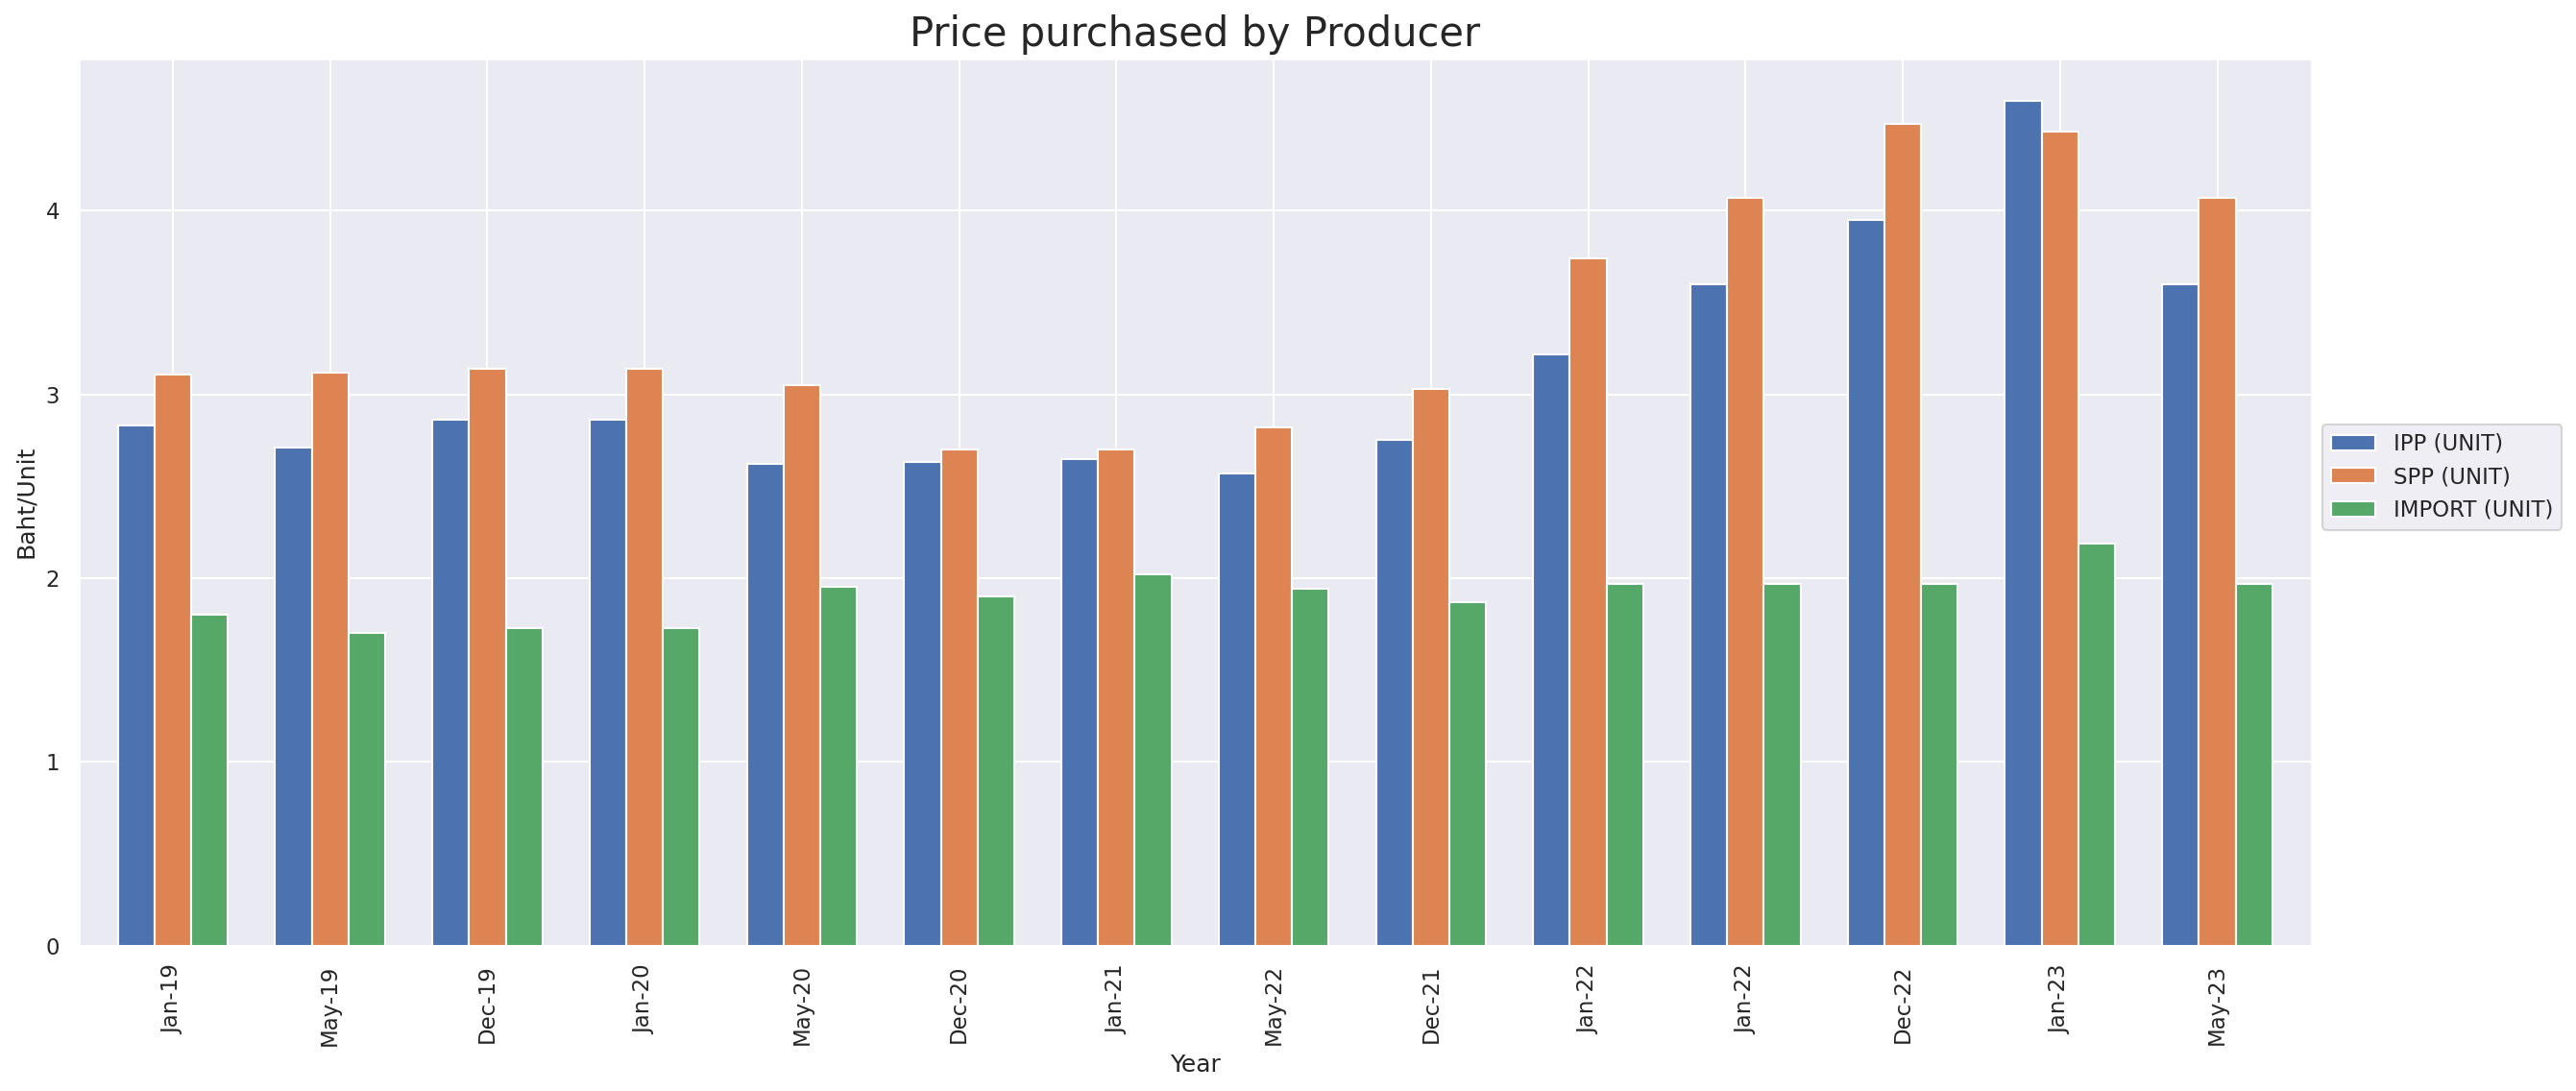

In [20]:
df2=df_price

year = df2['year']
fuel = df2['Fuel Oil (liter)'].astype(float)
diesel = df2['Diesel (liter)'].astype(float)
gas = df2['Gas (BTU)'].astype(float)
coil = df2['Coil (TON)'].astype(float)
ipp = df2['IPP (UNIT)'].astype(float)
spp= df2['SPP (UNIT)'].astype(float)
import_p = df2['IMPORT (UNIT)'].astype(float)

# #Plot
# plt.barh(year, fuel, label='Fuel Oil')
# plt.barh(year, diesel, label='Diesel')
# # plt.barh(year, gas, label='Gas')
# plt.bar(year, coil, marker='o', label='Coil')
# plt.barh(year, ipp, label='IPP')
# plt.barh(year, spp, label='SPP')
# plt.barh(year, import_p, label='Import')


df2.plot(x='year', kind='bar',figsize=(20,8),width = 0.7,title='Forcast PDP2010-2018')
sns.set(rc={'figure.dpi':150})




# df_price2=df_price[['year','Fuel Oil (liter)','Diesel (liter)']]

# df_price2.plot(x='year', kind='bar',figsize=(20,8),width = 1,title='Forcast PDP2010-2018')
# sns.set(rc={'figure.dpi':150})




# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Baht/Unit')
plt.title('Price purchased by Producer',fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 0.6))

# Displaying the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Jan-19'),
  Text(1, 0, 'May-19'),
  Text(2, 0, 'Dec-19'),
  Text(3, 0, 'Jan-20'),
  Text(4, 0, 'May-20'),
  Text(5, 0, 'Dec-20'),
  Text(6, 0, 'Jan-21'),
  Text(7, 0, 'May-22'),
  Text(8, 0, 'Dec-21'),
  Text(9, 0, 'Jan-22'),
  Text(10, 0, 'Dec-22'),
  Text(11, 0, 'Jan-23'),
  Text(12, 0, 'May-23')])

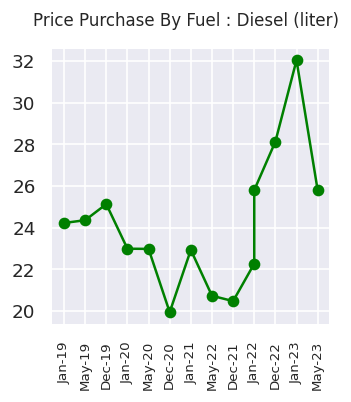

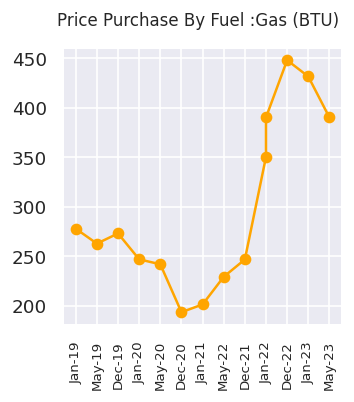

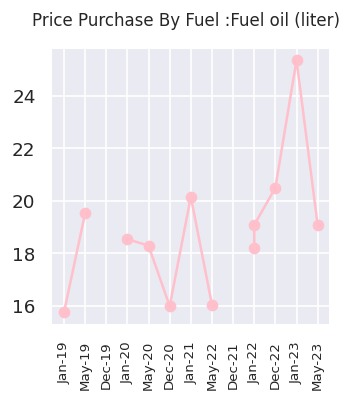

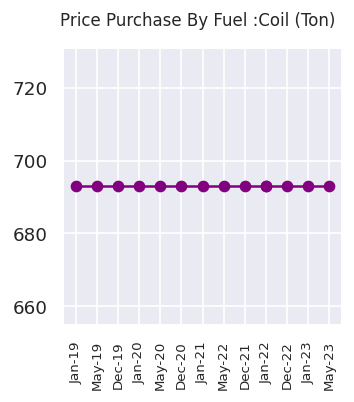

In [21]:
from mpl_toolkits.mplot3d.axes3d import axis3d

sns.set(rc={'figure.dpi':120})
fig, (ax1) = plt.subplots(1 , sharex=True,figsize=(3, 3))
fig.suptitle('Price Purchase By Fuel : Diesel (liter)',fontsize=10)
ax1.plot(year, diesel,marker='o',color='green')
plt.xticks(fontsize=8,rotation = 90)

fig, (ax2) = plt.subplots(1 , sharex=True,figsize=(3, 3))
fig.suptitle('Price Purchase By Fuel :Gas (BTU)',fontsize=10)
ax2.plot(year, gas,marker='o',color='orange')
plt.xticks(fontsize=8,rotation = 90)

fig, (ax3) = plt.subplots(1 , sharex=True,figsize=(3, 3))
fig.suptitle('Price Purchase By Fuel :Fuel oil (liter)',fontsize=10)
ax3.plot(year, fuel,marker='o',color='pink')
plt.xticks(fontsize=8,rotation = 90)

fig, (ax4) = plt.subplots(1 , sharex=True,figsize=(3, 3))
fig.suptitle('Price Purchase By Fuel :Coil (Ton)',fontsize=10)
ax4.plot(year, coil,marker='o',color='purple')
plt.xticks(fontsize=8,rotation = 90)




